In [18]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout, BatchNormalization
from sklearn.model_selection import KFold
import lightgbm as lgb
from sklearn.metrics import roc_auc_score,mean_squared_error
from sklearn.model_selection import  train_test_split
from keras import backend as K
from keras import optimizers
import keras as k
from keras.callbacks import EarlyStopping
from sklearn.utils import class_weight
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [19]:
data = pd.read_csv("../data/data_train.csv")
data = data.dropna()
print(data.shape)

(149503, 11)


In [20]:
data.describe()

,NE,QFIN,PFIN,TFIN,PIM,AIR_FLOW,THA,THW,LEGR,CEXREAL,soot
count,149503.000000,149503.000000,149503.000000,149503.000000,149503.000000,1.495030e+05,149503.000000,149503.000000,149503.000000,149503.000000,149503.000000
mean,1267.187860,34.470280,77.709593,-0.398118,142.099270,3.220595e+02,47.706389,86.529215,26.890545,17.069971,1.354455
std,308.128849,37.490713,32.493292,1.673498,36.681588,1.541262e+02,2.715745,1.328715,13.581330,5.262956,1.256869
min,696.754822,-1.733852,30.207851,-2.849953,106.314072,1.400000e-08,31.174412,66.683716,0.000000,4.674084,-0.015000
25%,1144.967163,5.355454,53.260523,-1.670740,116.823456,2.233254e+02,46.508974,85.869404,19.915110,12.605148,0.625000
50%,1325.732422,18.747795,77.721054,-1.089020,126.246201,2.922540e+02,47.805603,86.558945,23.248041,18.143646,1.223000
75%,1512.458862,58.435289,100.883682,0.518604,162.959183,4.117750e+02,49.147144,87.241043,31.738495,21.310923,1.802000
max,2198.406006,137.415710,197.605286,6.716738,265.274353,9.227142e+02,57.733215,94.996307,91.331413,23.219999,50.917000


In [21]:
data_val = pd.read_csv("../data/data_val.csv")
data_val = data_val.dropna()
print(data_val.shape)

(10074, 8)


In [22]:
data_val.describe()

,AIR_FLOW,CEXREAL,NE,PIM,QFIN,THA,THW,soot
count,10074.000000,10074.000000,10074.000000,10074.000000,10074.000000,10074.000000,10074.000000,10074.000000
mean,252.735201,15.298430,1807.447443,132.270738,33.455160,39.965545,82.007509,3.389491
std,130.870861,4.363786,468.391358,43.527617,31.702557,4.866747,6.964695,3.526631
min,45.279335,1.808797,623.030273,61.867807,-20.000000,23.552532,26.591095,-0.082859
25%,142.636178,12.492963,1490.433223,94.254512,14.466662,36.184744,82.415777,1.549106
50%,240.515665,14.919419,1897.001752,125.954067,30.132966,40.054237,83.347145,2.553451
75%,329.865215,18.073629,2159.111587,154.453493,45.285865,43.627675,84.275063,3.984945
max,662.114153,23.849813,2843.944871,255.019716,140.781628,55.561508,87.979614,81.929876


In [23]:
data_retrain = pd.read_csv("../data/data_retrain.csv")
data_retrain = data_retrain.dropna()
print(data_retrain.shape)

(7354, 8)


In [24]:
data_retrain.describe()

,AIR_FLOW,CEXREAL,NE,PIM,QFIN,THA,THW,soot
count,7354.000000,7354.000000,7354.000000,7354.000000,7354.000000,7354.000000,7354.000000,7354.000000
mean,294.470575,14.926410,1861.105026,151.657391,41.220636,43.943632,82.777771,4.324847
std,148.105500,4.606048,561.802756,44.906760,34.774125,5.186160,4.836160,8.727290
min,40.310375,0.000000,551.858582,62.894939,-20.000000,30.906445,36.877458,-0.077499
25%,180.180223,12.515393,1646.441727,113.201987,16.347710,40.176658,82.270829,1.852106
50%,295.100215,14.658117,1974.571494,147.359839,38.073005,42.846258,83.610756,2.627276
75%,412.183335,17.805841,2346.550659,186.658029,60.743824,46.846268,84.680286,4.553141
max,641.531343,23.219999,2771.285553,254.439293,141.001724,62.059204,88.394760,331.765937


In [25]:
data = data[['AIR_FLOW','CEXREAL','NE','PIM','QFIN','THA','THW','soot']]
data.describe()

,AIR_FLOW,CEXREAL,NE,PIM,QFIN,THA,THW,soot
count,1.495030e+05,149503.000000,149503.000000,149503.000000,149503.000000,149503.000000,149503.000000,149503.000000
mean,3.220595e+02,17.069971,1267.187860,142.099270,34.470280,47.706389,86.529215,1.354455
std,1.541262e+02,5.262956,308.128849,36.681588,37.490713,2.715745,1.328715,1.256869
min,1.400000e-08,4.674084,696.754822,106.314072,-1.733852,31.174412,66.683716,-0.015000
25%,2.233254e+02,12.605148,1144.967163,116.823456,5.355454,46.508974,85.869404,0.625000
50%,2.922540e+02,18.143646,1325.732422,126.246201,18.747795,47.805603,86.558945,1.223000
75%,4.117750e+02,21.310923,1512.458862,162.959183,58.435289,49.147144,87.241043,1.802000
max,9.227142e+02,23.219999,2198.406006,265.274353,137.415710,57.733215,94.996307,50.917000


In [26]:
data_3 = data_val[:3600]
data_3.head()

,AIR_FLOW,CEXREAL,NE,PIM,QFIN,THA,THW,soot
0,103.144539,13.376271,878.811829,98.241867,24.631491,26.028439,26.591095,-0.007867
1,112.019417,17.244316,883.847656,103.131760,17.761181,25.589216,26.599640,-0.029228
2,106.823563,9.655000,910.283874,103.752701,51.337620,25.216198,26.678501,0.022571
3,138.110199,9.991763,953.252339,100.665049,48.536731,24.828535,26.715402,1.871288
4,228.315754,11.806831,1675.204182,107.275184,37.028996,24.525156,26.741211,5.450678


In [27]:
data = pd.concat([data,data_retrain,data_3])
print(data.shape)

(160457, 8)


In [28]:
#删除97000--100000范围的数据
data['soot'][97000:100000] = -1
data_la = data[data['soot'] != -1]
#data = data_la.drop(data_la[(data_la['soot']<0.2)].index)
#f = lambda x : 20 if x>20 else x
#data2 = data['soot'].map(f)
data_la['soot'] = data_la['soot'].apply( lambda x: 0.1 if x<0.2 else x)
#data_la['soot'] = data_la['soot'].apply( lambda x: 20 if x>20 else x)
#data = data_la.drop(data_la[(data_la['soot']<0.2)].index)
#data_la['soot'] = data_la['soot'].apply( lambda x: 0.2 if (x < 0.3) & (x >0.1) else x)  
#data_la['soot'] = data_la['soot'].apply( lambda x: 0.15 if x<0.3 else x)

In [29]:
data_la.shape

(157457, 8)


 mu = 1.50 and sigma = 2.40



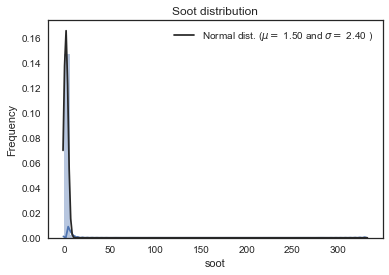

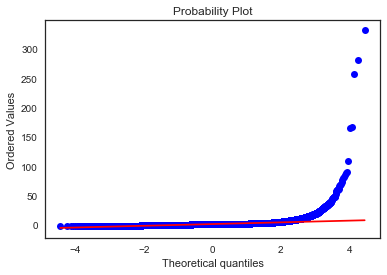

In [30]:
from scipy import stats
from scipy.stats import norm, skew
data_la['soot'] = np.log1p(data_la['soot'])

#Check the new distribution 
sns.distplot(data['soot'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['soot'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Soot distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['soot'], plot=plt)
plt.show()

In [31]:
test = pd.read_csv('../data/data_val_fin.csv')
test = test.dropna()
print(test.shape)

(6475, 8)


In [32]:
#Validation function
n_folds = 5
features =  data_la.columns.values[0:7]   
#data = data_la.drop(data_la[(data_la['soot']<0.2)].index)
data = data_la
train = data[features]

mean = train.mean(axis=0)
train -= mean
std = train.std(axis=0)
train /= std
test -= mean
test /= std


y_train = data['soot'].values


In [33]:
from sklearn.externals import joblib
#LGBM模型.施加random状态，5折交叉验证
evals_result = {}  #记录训练结果所用
features =  data_la.columns.values[0:7]
X_train = train.values
X_test = test[features].values
y_train = data_la['soot'].values
target =  data_la['soot']
predictions = np.zeros(len(test))
param = {'num_leaves': 120,
         'min_data_in_leaf': 30, 
         'objective':'regression',
         'max_depth': -1,
         'learning_rate': 0.01,
         "min_child_samples": 30,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9 ,
         "bagging_seed": 11,
         "metric": 'mse',
         "lambda_l1": 0.1,
         "verbosity": -1}
folds = KFold(n_splits=5, shuffle=True, random_state=0)
oof_lgb = np.zeros(len(data_la))
#predictions_lgb = np.zeros(len(test))

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train, y_train)):
    print("fold n°{}".format(fold_+1))
    trn_data = lgb.Dataset(X_train[trn_idx], y_train[trn_idx])
    val_data = lgb.Dataset(X_train[val_idx], y_train[val_idx])

    num_round = 20000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data],evals_result=evals_result,verbose_eval=200, early_stopping_rounds = 100)
    oof_lgb[val_idx] = clf.predict(X_train[val_idx], num_iteration=clf.best_iteration)
    
    predictions += clf.predict(X_test, num_iteration=clf.best_iteration) / folds.n_splits

print("CV score: {:<8.8f}".format(mean_squared_error(oof_lgb, target)))

fold n°1
Training until validation scores don't improve for 100 rounds.
[200]	training's l2: 0.0423891	valid_1's l2: 0.0458478
[400]	training's l2: 0.0292976	valid_1's l2: 0.0339004
[600]	training's l2: 0.024993	valid_1's l2: 0.0307293
[800]	training's l2: 0.022299	valid_1's l2: 0.0290423
[1000]	training's l2: 0.0204179	valid_1's l2: 0.0279732
[1200]	training's l2: 0.0189001	valid_1's l2: 0.0271988
[1400]	training's l2: 0.0176296	valid_1's l2: 0.026562
[1600]	training's l2: 0.0165579	valid_1's l2: 0.0261264
[1800]	training's l2: 0.0156107	valid_1's l2: 0.0257356
[2000]	training's l2: 0.0147902	valid_1's l2: 0.0254015
[2200]	training's l2: 0.0140664	valid_1's l2: 0.0251013
[2400]	training's l2: 0.0134006	valid_1's l2: 0.0248505
[2600]	training's l2: 0.0127938	valid_1's l2: 0.0246153
[2800]	training's l2: 0.0122653	valid_1's l2: 0.0244427
[3000]	training's l2: 0.0117692	valid_1's l2: 0.0242556
[3200]	training's l2: 0.0113112	valid_1's l2: 0.0241132
[3400]	training's l2: 0.0108944	valid_1

[1800]	training's l2: 0.0155359	valid_1's l2: 0.025713
[2000]	training's l2: 0.0146986	valid_1's l2: 0.0253208
[2200]	training's l2: 0.0139764	valid_1's l2: 0.0250042
[2400]	training's l2: 0.0133314	valid_1's l2: 0.0247207
[2600]	training's l2: 0.0127342	valid_1's l2: 0.0244812
[2800]	training's l2: 0.0122005	valid_1's l2: 0.0242687
[3000]	training's l2: 0.0117137	valid_1's l2: 0.0240733
[3200]	training's l2: 0.0112653	valid_1's l2: 0.0238902
[3400]	training's l2: 0.0108661	valid_1's l2: 0.0237377
[3600]	training's l2: 0.0104931	valid_1's l2: 0.023605
[3800]	training's l2: 0.0101343	valid_1's l2: 0.0234826
[4000]	training's l2: 0.00980593	valid_1's l2: 0.0233617
[4200]	training's l2: 0.0094944	valid_1's l2: 0.0232546
[4400]	training's l2: 0.00919366	valid_1's l2: 0.0231439
[4600]	training's l2: 0.0089213	valid_1's l2: 0.02306
[4800]	training's l2: 0.00866269	valid_1's l2: 0.0229717
[5000]	training's l2: 0.00842111	valid_1's l2: 0.0228973
[5200]	training's l2: 0.00819365	valid_1's l2: 0

Early stopping, best iteration is:
[15779]	training's l2: 0.00312697	valid_1's l2: 0.0209729
fold n°5
Training until validation scores don't improve for 100 rounds.
[200]	training's l2: 0.0424678	valid_1's l2: 0.0449741
[400]	training's l2: 0.0293565	valid_1's l2: 0.0334852
[600]	training's l2: 0.025017	valid_1's l2: 0.0304223
[800]	training's l2: 0.0222801	valid_1's l2: 0.0287195
[1000]	training's l2: 0.0203513	valid_1's l2: 0.0276595
[1200]	training's l2: 0.0188622	valid_1's l2: 0.0269039
[1400]	training's l2: 0.0175798	valid_1's l2: 0.0262626
[1600]	training's l2: 0.0165023	valid_1's l2: 0.0257466
[1800]	training's l2: 0.0155748	valid_1's l2: 0.0253384
[2000]	training's l2: 0.0147647	valid_1's l2: 0.0249886
[2200]	training's l2: 0.0140408	valid_1's l2: 0.0246891
[2400]	training's l2: 0.0133717	valid_1's l2: 0.0244027
[2600]	training's l2: 0.0127779	valid_1's l2: 0.0241609
[2800]	training's l2: 0.0122397	valid_1's l2: 0.0239513
[3000]	training's l2: 0.0117578	valid_1's l2: 0.0237792


In [28]:
#保存/加载模型pickle
import pickle
s=pickle.dumps(clf)
#pickle.dump(clf,'lightgbm_model/lightgbm_ori.pkl')
f=open('lightgbm_model/lightgbm.txt','wb')
f.write(s)
f.close()
f2=open('lightgbm_model/lightgbm.txt','rb')
s2=f2.read()
clf2=pickle.loads(s2)
clf2.predict(X_test)

array([1.15877683, 1.18593286, 0.94227553, ..., 1.55534202, 1.63853344,
       1.61215618])

In [14]:
#保存/加载模型joblib
from sklearn.externals import joblib
#joblib.dump(clf,'lightgbm_model/lightgbm_joblib.pkl')
clf=joblib.load('lightgbm_model/lightgbm_joblib.pkl')
#clf.predict(X_test)

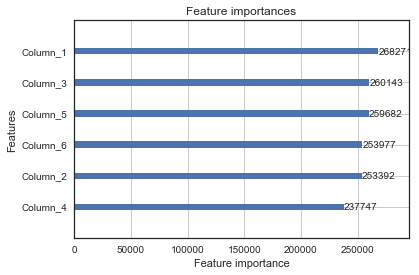

In [15]:
#画出模型特征重要性，前6列特征的重要性比较
plt.figure(figsize=(12,6))
lgb.plot_importance(clf, max_num_features=6)
plt.title("Feature importances")
plt.show()

In [16]:
### 特征选择，得到特征参数
df = pd.DataFrame(train.columns.tolist(), columns=['feature'])
df['importance']=list(clf.feature_importance())
df = df.sort_values(by='importance',ascending=False)
df.to_csv("lightgbm_model/feature_score.csv",index=None,encoding='gbk')

NameError: name 'train' is not defined

画出训练结果...


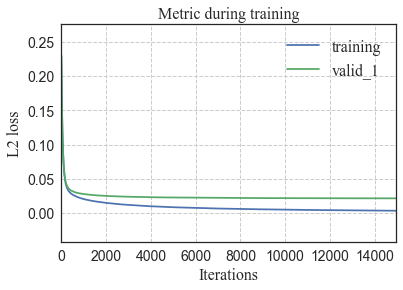

In [34]:
sns.set_style('white')
print('画出训练结果...')
ax = lgb.plot_metric(evals_result)#metric的值与之前的params里面的值对应
font = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 16,
}
plt.ylabel('L2 loss',font)
plt.xlabel('Iterations',font)
plt.xticks(fontsize=14,fontweight='normal') #默认字体大小为10
plt.yticks(fontsize=14,fontweight='normal')
plt.grid(linestyle = '--')     # 添加网格线
plt.title('Metric during training',font)
plt.savefig('1.jpg',dpi=600, bbox_inches = 'tight')
plt.legend(loc='best',prop = font)
plt.show()

In [26]:
#得到测试集预测结果
lgb_pred = np.expm1(predictions)
sub = pd.DataFrame()
sub['soot'] = lgb_pred
sub.to_csv('lightgbm_model/submission.csv',index=False)